In [15]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import random 
from PIL import Image
%matplotlib inline

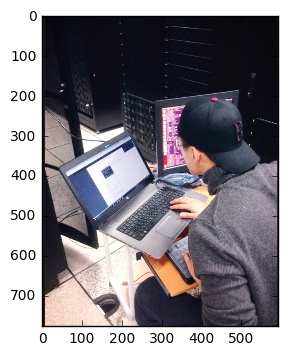

In [155]:
img=plt.imread('./test.png')
plt.imshow(img)
np_img = np.asarray(img)
np.save('./test_np',np_img)

In [143]:
def crawl_folder(folder_path): #search_str 찾고자 하는 string 
    search_path_list=[]
    fileList = os.walk(folder_path).next()[2]
    subFolder_list = os.walk(folder_path).next()[1]
    if(len(fileList)!=0):
        for j in range(len(fileList)):
            search_path_list.append(folder_path+'/'+fileList[j])
    if len(subFolder_list)==0:
        return search_path_list
    else: 
        for i in range(len(subFolder_list)):
            search_path_list.extend(crawl_folder(folder_path+'/'+subFolder_list[i] ))
        return search_path_list


In [144]:
def crop_for_test_img(path , row , col , fliplr_flag , flipud_flag):
        """
        이름에 . 이 들어 있으면 _으로 바꾸는 알고리즘을 넣어야 한다 . 
        """
        
        name = path.split('/')[-1].split('.')[0]  #<-- 이름을 만드는 것에 취약하다
        extension = path.split('/')[-1].split('.')[-1]
        
        test_img = np.zeros(shape = [15 , row , col ])
        if  'npy' == extension:
            np_img=np.load(path)
        else:
            img=Image.open(path)
            np_img=np.asarray(img)
        shape=np.shape(np_img)
        print len(shape)
        if len(shape )==2:
            ret_np_imgs = np.zeros([15 , row , col ]) ##### 
        if len(shape) ==3:
            ret_np_imgs = np.zeros([15 , row , col, shape[-1]]) ##### 
        
        shape=np.shape(np_img)
        center_row =shape[0]/2
        center_col =shape[1]/2

        ret_np_imgs[0]=np_img[:row , :col]
        ret_np_imgs[1]= np_img[:row , -col:]
        ret_np_imgs[2]=np_img[center_row - row/2 : center_row + row/2 , center_col - col/2 :center_col +col/2]
        ret_np_imgs[3]=np_img[-row: , :col]
        ret_np_imgs[4]=np_img[-row: , -col:]
        
        if fliplr_flag == False and flipud_flag ==False:
            ret_np_imgs=ret_np_imgs[:5] ## 처음에 배열의 크기를 15라고 지정해놨지만 실제로 들어간건 15이라서 뒤에 10는 자른다.
        elif fliplr_flag == True and flipud_flag == False: 
            ret_np_imgs[5]= np.fliplr(np_img[:row , :col])
            ret_np_imgs[6]= np.fliplr(np_img[:row , -col:])
            ret_np_imgs[7]=np.fliplr(np_img[center_row - row/2 : center_row + row/2 , center_col - col/2 :center_col +col/2])
            ret_np_imgs[8]= np.fliplr(np_img[-row: , :col])
            ret_np_imgs[9]= np.fliplr(np_img[-row: , -col:])
            ret_np_imgs=ret_np_imgs[:10] ## 처음에 배열의 크기를 15라고 지정해놨지만 실제로 들어간건 10이라서 뒤에 5는 자른다.

        
        elif fliplr_flag == False and flipud_flag == True:
            ret_np_imgs[5]= np.flipud(np_img[:row , :col])
            ret_np_imgs[6]= np.flipud(np_img[:row , -col:])
            ret_np_imgs[7]= np.flipud(np_img[center_row - row/2 : center_row + row/2 , center_col - col/2 :center_col +col/2])            
            ret_np_imgs[8]= np.flipud(np_img[-row: , -col:])
            ret_np_imgs[9]= np.flipud(np_img[-row: , -col:])
            ret_np_imgs=ret_np_imgs[:10] ## 처음에 배열의 크기를 15라고 지정해놨지만 실제로 들어간건 10이라서 뒤에 5는 자른다.

        elif fliplr_flag == True and flipud_flag == True:
            ret_np_imgs[5]= np.flipud(np_img[:row , :col])
            ret_np_imgs[6]= np.flipud(np_img[:row , -col:])
            ret_np_imgs[7]=np.flipud(np_img[center_row - row/2 : center_row + row/2 , center_col - col/2 :center_col +col/2])
            ret_np_imgs[8]= np.flipud(np_img[-row: , :col])
            ret_np_imgs[9]= np.flipud(np_img[-row: , -col:])
            ret_np_imgs[10]= np.fliplr(np_img[:row , :col])
            ret_np_imgs[11]= np.fliplr(np_img[:row , -col:])
            ret_np_imgs[12]=np.fliplr(np_img[center_row - row/2 : center_row + row/2 , center_col - col/2 :center_col +col/2])
            ret_np_imgs[13]= np.fliplr(np_img[-row: , :col])
            ret_np_imgs[14]= np.fliplr(np_img[-row: , -col:])        

        
        return  ret_np_imgs
    

# Verify 

3


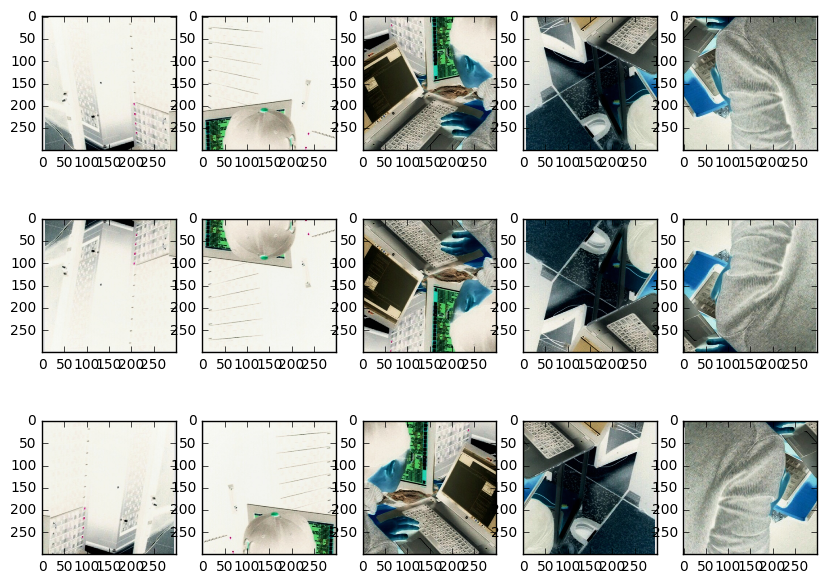

In [152]:
ret_np_imgs=crop_for_test_img('./test.png' , 300,300 , True , True )
fig = plt.figure(figsize= (10,10))
for i in range(len(ret_np_imgs)):
    a= fig.add_subplot(4,5,i+1) 
    plt.imshow(ret_np_imgs[i])

3


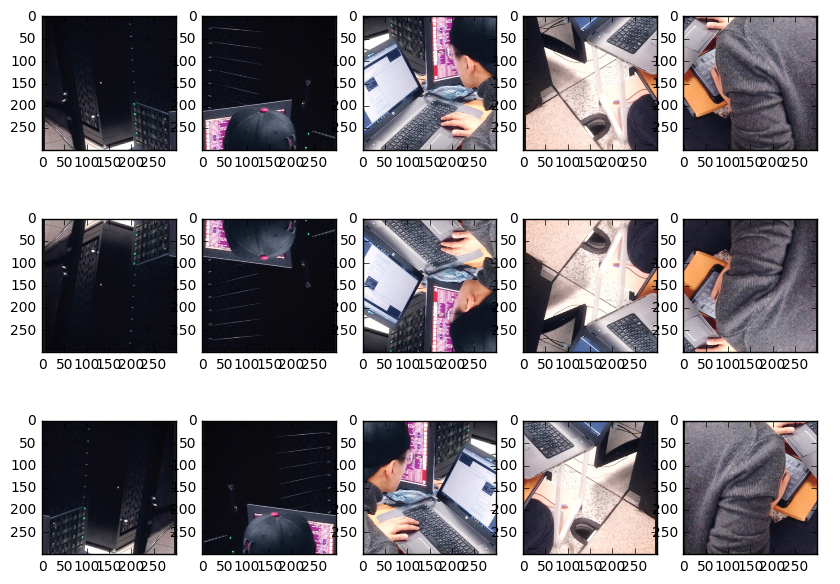

In [156]:
ret_np_imgs=crop_for_test_img('./test_np.npy' , 300,300 , True , True )
fig = plt.figure(figsize= (10,10))
for i in range(len(ret_np_imgs)):
    a= fig.add_subplot(4,5,i+1) 
    plt.imshow(ret_np_imgs[i])